# COGS 108 - Data Checkpoint

# Names

- Neil Damle
- Pavit Saluja
- Ahladita Lotti
- David Cook
- Daniel Finn

<a id='research_question'></a>
# Research Question

***What (if any) are the effects of weather, traffic control and substance abuse on the severity and frequency of traffic accidents in Montgomery County, MD? Based on these factors, can we predict the severity of car accidents?***

We changed our original research question to narrow the scope of the question in terms of variables; we have now decided to focus on Weather, Traffic Conditions, and Driver Condition as our key factors. We also narrowed the scope of the question to Montgomery County specifically due to the best avaiable dataset only consisting on information from that area. As a result, any findings from this dataset will only be relevant to that area.

# Dataset(s)


- Dataset Name: Montgomery County Crash Reporting & Drivers Data
- Link to the dataset: https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632
- Number of observations: 159,357

The dataset available on crash reports from Montgomery County, Maryland provides detailed information about traffic accidents, including data on drivers involved, vehicles, and contributing factors collected by the Automated Crash Reporting System of the Maryland State Police. The dataset offers valuable insights for analyzing crash trends, identifying risk factors, and conceptualizing road safety improvements in Montgomery County. There are 159,357 recordings and 43 columns of variables, but we will trimmed down the columns to focus on our areas of interest: environmental conditions, substance abuse, traffic control and severity of the crash. It is important to note that this data is updated weekly, and the data presented in this report is accurate as of May 11, 2023.

# Setup

In [1]:
# Importing libraries used for cleaning data
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date

#imports for EDA
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Read csv file and store as df
df = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")

/Users/neildamle/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3442: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#previewing the dataframe
df

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,NaN,NaN,NaN,NaN,PARKING LOT,...,15,No,No,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)"
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,06/18/2020 02:00:00 AM,County,DAIRYMAID DR,County,METZ DR,NaN,...,35,No,No,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
2,MCP2651004P,210035267,Montgomery County Police,Property Damage Crash,09/08/2021 12:30:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 10109 COLESVILLE RD,...,0,No,No,2010,TOYOTA,SUV,UNKNOWN,39.020303,-77.011436,"(39.02030267, -77.01143583)"
3,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,NaN,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
4,MCP2641001J,200016526,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159352,DD5657000N,230022295,Rockville Police Departme,Property Damage Crash,05/09/2023 08:00:00 PM,Maryland (State),FIRST ST,Municipality,BALTIMORE RD,NaN,...,35,No,No,2010,TOYOTA,COROLLA,NO MISUSE,39.083842,-77.136440,"(39.08384167, -77.13644033)"
159353,EJ78880049,230021216,Gaithersburg Police Depar,Property Damage Crash,05/03/2023 06:30:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 18445 LOST KNIFE CIR,...,0,No,Yes,2020,NISS,UT,NO MISUSE,39.155698,-77.199992,"(39.15569758, -77.19999162)"
159354,MCP3329001L,230021025,Montgomery County Police,Property Damage Crash,05/02/2023 06:33:00 PM,County,CHERRY HILL RD,County,BROADBIRCH DR,NaN,...,40,No,No,2019,TOYT,SD,NO MISUSE,39.057452,-76.954973,"(39.05745233, -76.95497267)"
159355,MCP3084006Q,230019670,Montgomery County Police,Property Damage Crash,04/25/2023 06:53:00 AM,County,NICHOLSON LA,County,WOODGLEN DR,NaN,...,30,No,No,2000,HONDA,CIVIC,NO MISUSE,39.044830,-77.113647,"(39.04483, -77.11364667)"


In [4]:
#look at all the types for all the columns
types = df.dtypes
types

Report Number                      object
Local Case Number                  object
Agency Name                        object
ACRS Report Type                   object
Crash Date/Time                    object
Route Type                         object
Road Name                          object
Cross-Street Type                  object
Cross-Street Name                  object
Off-Road Description               object
Municipality                       object
Related Non-Motorist               object
Collision Type                     object
Weather                            object
Surface Condition                  object
Light                              object
Traffic Control                    object
Driver Substance Abuse             object
Non-Motorist Substance Abuse       object
Person ID                          object
Driver At Fault                    object
Injury Severity                    object
Circumstance                       object
Driver Distracted By              

In [5]:
#count the number of NaN in the dataframe by column (will have to decide how to handle)
df.isna().sum()

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         15647
Road Name                          14771
Cross-Street Type                  15673
Cross-Street Name                  14780
Off-Road Description              144588
Municipality                      141657
Related Non-Motorist              154338
Collision Type                       537
Weather                            12478
Surface Condition                  18693
Light                               1322
Traffic Control                    23910
Driver Substance Abuse             28971
Non-Motorist Substance Abuse      155381
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      129956
Driver Distracted By                   0
Drivers License 

# Data Cleaning

In [6]:
# Previewing column names before keeping what is needed
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [7]:
#extract relevant columns
df = df[['ACRS Report Type',
       'Crash Date/Time', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse',
       'Driver At Fault', 'Injury Severity',
       'Driver Distracted By',
       'Vehicle Damage Extent', 'Vehicle First Impact Location','Vehicle Body Type','Speed Limit','Vehicle Year',
       'Vehicle Make','Location']]

In [8]:
#convert Crash Date/Time to DateTime, split into two columns, drop original column
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])
df['Date'] = df['Crash Date/Time'].apply(lambda x: x.date())
df['Time'] = df['Crash Date/Time'].apply(lambda x: x.time())
df = df.drop(['Crash Date/Time'], axis=1)

/var/folders/nm/00d2qs7s13z3fv7y84pz9pvr0000gn/T/ipykernel_7454/3141589886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])
/var/folders/nm/00d2qs7s13z3fv7y84pz9pvr0000gn/T/ipykernel_7454/3141589886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Crash Date/Time'].apply(lambda x: x.date())
/var/folders/nm/00d2qs7s13z3fv7y84pz9pvr0000gn/T/ipykernel_7454/3141589886.py:4: SettingWithCopyWarning: 
A value is trying to be set o

In [9]:
# Finding the total for each value in the column "Vehicle Damage Extent" 
# (and other columns) to explore the distributions
df['Vehicle Damage Extent'].value_counts()

DISABLING      57729
FUNCTIONAL     41809
SUPERFICIAL    40753
DESTROYED       6905
UNKNOWN         6019
NO DAMAGE       5765
OTHER             97
Name: Vehicle Damage Extent, dtype: int64

In [10]:
# Substituting "UNKNOWN" for the null values and checking to see 0 null values 
df = df.fillna('UNKNOWN')
df.isna().sum()

ACRS Report Type                 0
Collision Type                   0
Weather                          0
Surface Condition                0
Light                            0
Traffic Control                  0
Driver Substance Abuse           0
Driver At Fault                  0
Injury Severity                  0
Driver Distracted By             0
Vehicle Damage Extent            0
Vehicle First Impact Location    0
Vehicle Body Type                0
Speed Limit                      0
Vehicle Year                     0
Vehicle Make                     0
Location                         0
Date                             0
Time                             0
dtype: int64

In [11]:
#Create ordinal versions of columns to allow for potential analysis in the future
df['Injury_Ordinal'] = df['Injury Severity'].map({'NO APPARENT INJURY':0, "POSSIBLE INJURY":1,
                                                  "SUSPECTED MINOR INJURY":2, "SUSPECTED SERIOUS INJURY":3,
                                                 "FATAL INJURY":4})
df['Damage_Ordinal'] = df['Vehicle Damage Extent'].map({'UNKNOWN':0, 'NO DAMAGE':0,'OTHER':0, "SUPERFICIAL":1,
                                                  "FUNCTIONAL":2, "DISABLING":3,
                                                 "DESTROYED":4})


In [12]:
#standardizing the make of the car (there were previously many typos and other issues)
def standardize_make(str_in):
    
    try:
        str_in = str_in.lower()
        str_in = str_in.strip()

        if 'toy' in str_in:
            str_in = 'Toyota'
        elif 'hon' in str_in:
            str_in = 'Honda'
        elif 'for' in str_in:
            str_in = 'Ford'
        elif 'nis' in str_in:
            str_in = 'Nissan'
        elif 'dod' in str_in:
            str_in = 'Dodge'
        elif 'hyu' in str_in:
            str_in = 'Hyundai'
        elif 'chev' in str_in:
            str_in = 'Chevrolet'    
        elif 'je' in str_in:
            str_in = 'Jeep'
        elif 'bmw' in str_in:
            str_in = 'Bmw'
        elif 'acu' in str_in:
            str_in = 'Acura'
        elif 'lex' in str_in:
            str_in = 'Lexus'
        elif 'ki' in str_in:
            str_in = 'Kia'
        elif 'sub' in str_in:
            str_in = 'Subaru'
        elif 'maz' in str_in:
            str_in = 'Mazda'
        elif 'mer' in str_in:
            str_in = 'Mercedes'
        else:
            str_in = 'Other'
    except:
        output = np.nan
        
    output = str_in  
    
    return output

df['Vehicle Make'] = df['Vehicle Make'].apply(standardize_make)

In [13]:
# Final Dataframe Preview
df.head()

,ACRS Report Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,Injury Severity,Driver Distracted By,...,Vehicle First Impact Location,Vehicle Body Type,Speed Limit,Vehicle Year,Vehicle Make,Location,Date,Time,Injury_Ordinal,Damage_Ordinal
0,Property Damage Crash,SINGLE VEHICLE,CLEAR,UNKNOWN,DAYLIGHT,UNKNOWN,NONE DETECTED,Yes,NO APPARENT INJURY,NOT DISTRACTED,...,TWELVE OCLOCK,SCHOOL BUS,15,2017,Other,"(39.10351817, -77.15766933)",2019-09-26,07:20:00,0,1
1,Property Damage Crash,OTHER,CLOUDY,DRY,UNKNOWN,UNKNOWN,UNKNOWN,Yes,NO APPARENT INJURY,UNKNOWN,...,UNKNOWN,UNKNOWN,35,2020,Other,"(39.15484667, -77.271245)",2020-06-18,02:00:00,0,0
2,Property Damage Crash,OTHER,CLEAR,UNKNOWN,DAYLIGHT,UNKNOWN,UNKNOWN,Yes,NO APPARENT INJURY,UNKNOWN,...,SIX OCLOCK,(SPORT) UTILITY VEHICLE,0,2010,Toyota,"(39.02030267, -77.01143583)",2021-09-08,12:30:00,0,1
3,Property Damage Crash,OTHER,CLEAR,DRY,DAYLIGHT,NO CONTROLS,ALCOHOL PRESENT,Yes,NO APPARENT INJURY,UNKNOWN,...,TWELVE OCLOCK,VAN,25,2004,Dodge,"(39.08006167, -77.097845)",2020-04-19,15:39:00,0,3
4,Injury Crash,OTHER,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,Yes,POSSIBLE INJURY,UNKNOWN,...,ELEVEN OCLOCK,PASSENGER CAR,25,2006,Honda,"(39.17523, -77.24109)",2020-04-20,09:15:00,1,3


# Data Cleaning Process Description:
The data cleaning process started with keeping the columns that we decided were most relevant for our question. From there we split the Date and Time column into two separate columns (and dropped the original) that would allow for more detailed analysis in the future.

After looking at all the columns with null values, we decided that UNKNOWN was the best label for data that had null values based on the fact that there were already values that had that label. This meant that in cases where rows had null values, we could replace it with UNKNOWN -> this would allow us to ensure that data was labeled consistently and efficiently.

Lastly, we created ordinal versions of the columns using a map so that we can conduct analysis in the future parts of the project with integer values rather than strings. This also allows us to rank different labels, for example we could look for collisions more severe than SUPERFICIAL using the numeric values.

Overall, after this process, we feel well prepared to begin analysis in the next part of the project.


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section
The current goal with our EDA is to analyze different variables to see if we suspect a relationship between them. Our main dependent variable here will be severity of the accident (measured in terms of injury and vehicle damage) as that is the issue in accidents that we are most interested in.

In [14]:
from scipy.stats import chisquare
df_severe_damage = df[df["Damage_Ordinal"] >= 4]
df_severe_injury = df[df["Injury_Ordinal"] >= 3]
df_severe_injury_special = df[df["Injury_Ordinal"] >= 2]

## Variable Distributions

<AxesSubplot:xlabel='Injury_Ordinal', ylabel='Count'>

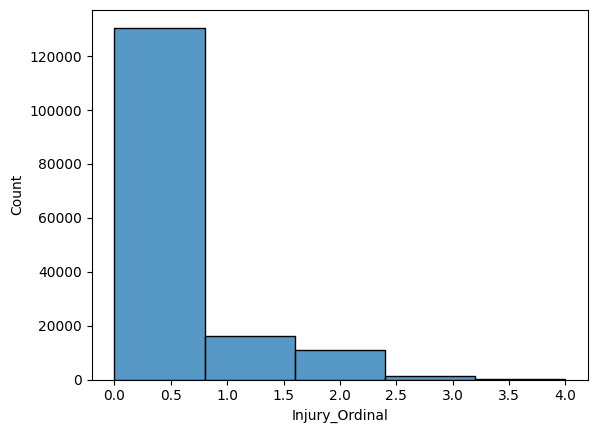

In [15]:
#Distribution of severity of accidents
# We can see that a vast majority of the collisions result little to no human injury
sns.histplot(data=df,x='Injury_Ordinal',bins = 5)

<AxesSubplot:xlabel='Damage_Ordinal', ylabel='Count'>

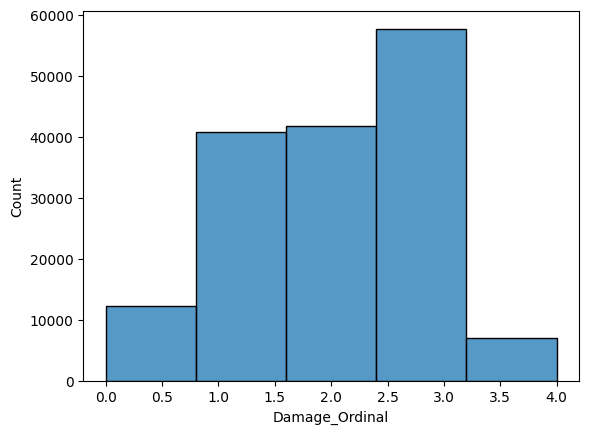

In [16]:
#Distribution of damage to the vehicle
# In this plot it looks like there are many occurences of most damage levels, with most happening between 1-3
sns.histplot(data=df,x='Damage_Ordinal',bins=5)

## Minutes After Midnight

In [17]:
# defining and applying a function that converts all times to minutes past midnight
def time_to_min(t_in):
    minutes = t_in.minute + t_in.hour * 60
    return minutes

df['Minutes'] = df['Time'].apply(time_to_min)

### Damage Ordinal

[Text(0.5, 1.0, 'Damage Severity against minutes since midnight')]

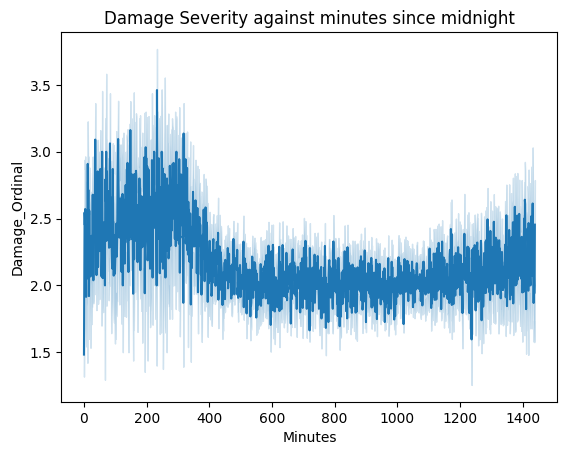

In [18]:
#Plotting damage severity with respect to time 
"""
From this plot we can see that it appears that crashes that occur in the first 5 hours (300 minutes) after midnight
have a higher average damage level than during other parts of the day
"""
sns.lineplot(data=df,x='Minutes',y='Damage_Ordinal').set(title='Damage Severity against minutes since midnight')

In [19]:
import statsmodels.api as sm
import patsy
outcome_min_dam, predictor_min_dam = patsy.dmatrices('Damage_Ordinal ~ Minutes', df)
mod_min_dam = sm.OLS(outcome_min_dam, predictor_min_dam)
res_min_dam = mod_min_dam.fit()
print(res_min_dam.summary())

                            OLS Regression Results                            
Dep. Variable:         Damage_Ordinal   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     434.5
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           2.26e-96
Time:                        22:53:13   Log-Likelihood:            -2.3313e+05
No. Observations:              159357   AIC:                         4.663e+05
Df Residuals:                  159355   BIC:                         4.663e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1840      0.007    296.596      0.0

### Injury Ordinal

[Text(0.5, 1.0, 'Injury Severity against minutes since midnight')]

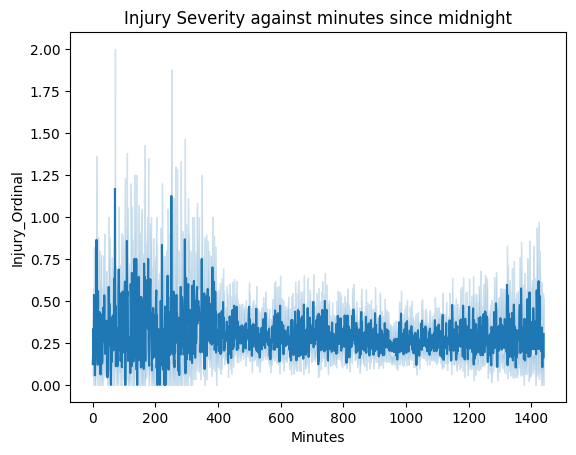

In [20]:
# Plotting injury severity with respect to time
"""
From this plot, it appears that the average rate of injury stays constant throughout the day, but there are spikes
in the early hours of the day.
"""
sns.lineplot(data=df,x='Minutes',y='Injury_Ordinal').set(title='Injury Severity against minutes since midnight')

In [21]:
outcome_min_inj, predictor_min_inj = patsy.dmatrices('Injury_Ordinal ~ Minutes', df)
mod_min_inj = sm.OLS(outcome_min_inj, predictor_min_inj)
res_min_inj = mod_min_inj.fit()
print(res_min_inj.summary())

                            OLS Regression Results                            
Dep. Variable:         Injury_Ordinal   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     58.29
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           2.28e-14
Time:                        22:54:11   Log-Likelihood:            -1.5236e+05
No. Observations:              159357   AIC:                         3.047e+05
Df Residuals:                  159355   BIC:                         3.047e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3011      0.004     67.877      0.0

## Days After January 1st

In [22]:
# Defining and applying a function that converts dates into days from January 1st
def days_since_jan1(d_in):
    first = date(d_in.year,1,1)
    return (d_in - first).days
df['Days_Since_Jan_1'] = df['Date'].apply(days_since_jan1)

### Damage Ordinal

<AxesSubplot:xlabel='Days_Since_Jan_1', ylabel='Damage_Ordinal'>

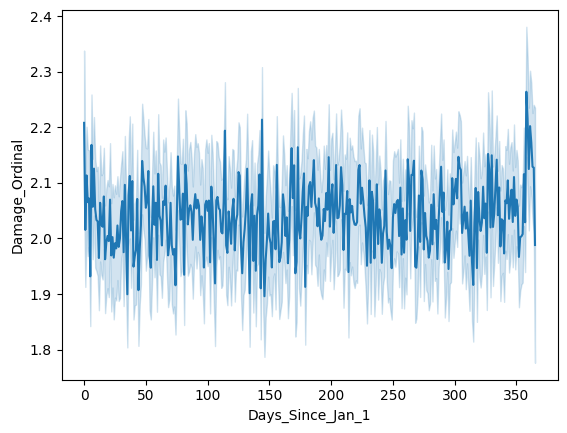

In [23]:
# Plotting Vehicle Damage Values against Days of the Year
"""
It's interesting to note that there isn't the same peak in the summer values, instead it appears that the peak occurs
during the winter.
""" 
sns.lineplot(data=df,x='Days_Since_Jan_1',y='Damage_Ordinal')


In [24]:
outcome_day_dam, predictor_day_dam = patsy.dmatrices('Damage_Ordinal ~ Days_Since_Jan_1', df)
mod_day_dam = sm.OLS(outcome_day_dam, predictor_day_dam)
res_day_dam = mod_day_dam.fit()
print(res_day_dam.summary())

                            OLS Regression Results                            
Dep. Variable:         Damage_Ordinal   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.336
Date:                Thu, 08 Jun 2023   Prob (F-statistic):            0.00225
Time:                        22:54:29   Log-Likelihood:            -2.3334e+05
No. Observations:              159357   AIC:                         4.667e+05
Df Residuals:                  159355   BIC:                         4.667e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.0268      0.005  

### Injury Ordinal

In [1]:
# Plotting Injury Values against Days of the Year
sns.lineplot(data=df,x='Days_Since_Jan_1',y='Injury_Ordinal')
#Interestingly we see a peak around the middle of the year (summer) here, and lower values during the winter.

NameError: name 'sns' is not defined

In [26]:
outcome_day_inj, predictor_day_inj = patsy.dmatrices('Injury_Ordinal ~ Days_Since_Jan_1', df)
mod_day_inj = sm.OLS(outcome_day_inj, predictor_day_inj)
res_day_inj = mod_day_inj.fit()
print(res_day_inj.summary())

                            OLS Regression Results                            
Dep. Variable:         Injury_Ordinal   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.845
Date:                Thu, 08 Jun 2023   Prob (F-statistic):              0.174
Time:                        22:54:48   Log-Likelihood:            -1.5239e+05
No. Observations:              159357   AIC:                         3.048e+05
Df Residuals:                  159355   BIC:                         3.048e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2658      0.003  

## Vehicle Make

### Damage Ordinal

<AxesSubplot:ylabel='Vehicle Make'>

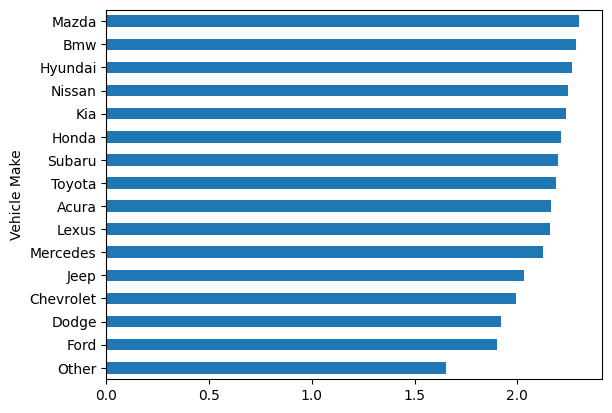

In [27]:
averages_make = df[['Vehicle Make', 'Damage_Ordinal']].groupby('Vehicle Make').mean()
averages_make = averages_make['Damage_Ordinal'].sort_values()
averages_make.plot(kind = 'barh')

In [28]:
obs_damage_make = df_severe_damage["Vehicle Make"].value_counts()
exp_damage_make = df["Vehicle Make"].value_counts()*df_severe_damage.shape[0]/df.shape[0]
chisquare(obs_damage_make, f_exp = exp_damage_make)

Power_divergenceResult(statistic=79.58815706736956, pvalue=8.306418289685414e-11)

### Injury Ordinal

<AxesSubplot:ylabel='Vehicle Make'>

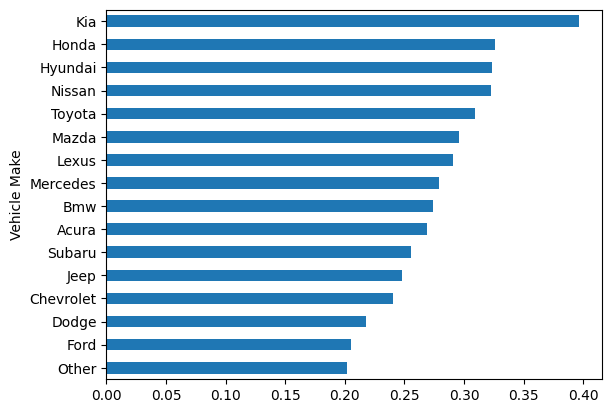

In [29]:
# Checking which company makes the safest cars for people
"""
It looks like there is a significant leader in terms of crash severity, Kia, which has a much higher average injury 
severity value. Most of the other brands have similar values, but it is interesting to note that other has the 
lowest value. This could be because less significant car crashes recieve less detailed reporting, which may lead to 
not reporting the vehicle's make.
"""
averages_make = df[['Vehicle Make', 'Injury_Ordinal']].groupby('Vehicle Make').mean()
averages_make = averages_make['Injury_Ordinal'].sort_values()
averages_make.plot(kind = 'barh')

In [30]:
obs_injury_make = df_severe_injury["Vehicle Make"].value_counts()
exp_injury_make = df["Vehicle Make"].value_counts()*df_severe_injury.shape[0]/df.shape[0]
chisquare(obs_injury_make, f_exp = exp_injury_make)

Power_divergenceResult(statistic=39.68348990010966, pvalue=0.0005061486153549756)

## Driver Substance Abuse

### Damage Ordinal

<AxesSubplot:ylabel='Driver Substance Abuse'>

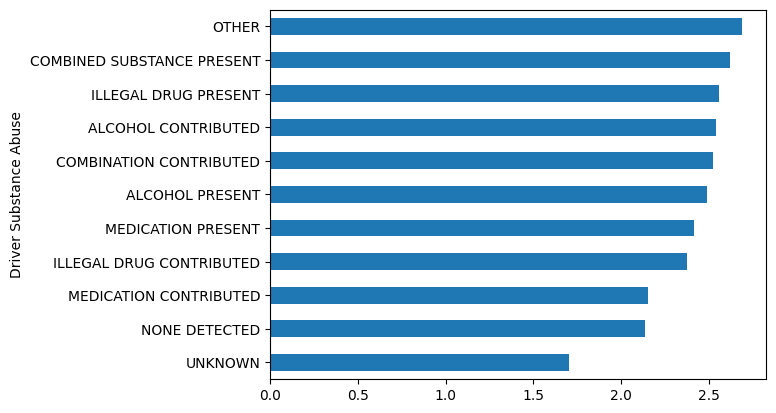

In [31]:
# Checking to see if presence of substance abuse leads to worse accidents
averages_substance = df[['Driver Substance Abuse', 'Damage_Ordinal']].groupby('Driver Substance Abuse').mean()
averages_substance = averages_substance['Damage_Ordinal'].sort_values()
averages_substance.plot(kind = 'barh')
# As one might expect, the most severe crashes occured when multiple substances were involved

In [32]:
obs_damage_substance = df_severe_damage["Driver Substance Abuse"].value_counts()
exp_damage_substance = df["Driver Substance Abuse"].value_counts()*df_severe_damage.shape[0]/df.shape[0]
chisquare(obs_damage_substance, f_exp = exp_damage_substance)

Power_divergenceResult(statistic=1499.2214195005074, pvalue=0.0)

### Injurty Ordinal

<AxesSubplot:ylabel='Driver Substance Abuse'>

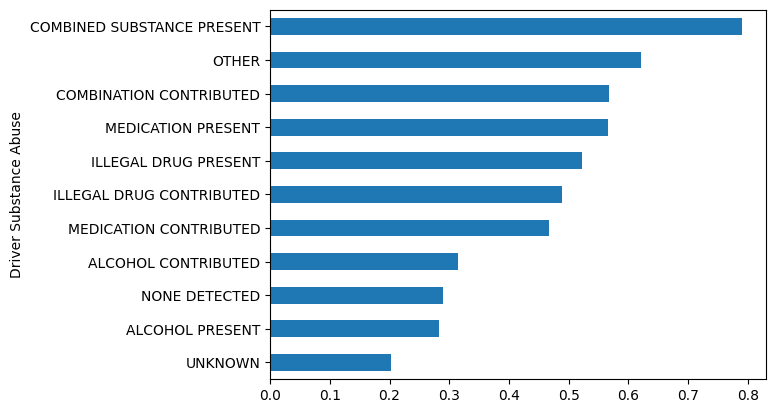

In [33]:
# Checking to see if presence of substance abuse leads to worse accidents
averages_substance = df[['Driver Substance Abuse', 'Injury_Ordinal']].groupby('Driver Substance Abuse').mean()
averages_substance = averages_substance['Injury_Ordinal'].sort_values()
averages_substance.plot(kind = 'barh')
# As one might expect, the most severe crashes occured when multiple substances were involved

In [34]:
obs_injury_substance = df_severe_injury["Driver Substance Abuse"].value_counts()
exp_injury_substance = df["Driver Substance Abuse"].value_counts()*df_severe_injury.shape[0]/df.shape[0]
chisquare(obs_injury_substance, f_exp = exp_injury_substance)

Power_divergenceResult(statistic=280.18413501287824, pvalue=2.380780713719304e-54)

## Vehicle Year

In [35]:
# defining and applying a function that cleans the values for the years the vehicle in the collision
def find_year(y_in):
    #If it came out before the model T, I'm not counting it.
    #Dataset was updated in 2023, meaning the newest model would be 2024
    if(y_in < 1908 or y_in > 2024):
        output = np.nan
    else:
        output = y_in
    return output
df['Vehicle_Year'] = df['Vehicle Year'].apply(find_year)

In [36]:
#df['Vehicle_Year_Since_1975'] = df['Vehicle Year'] - 1975
#df['Vehicle_Year_Since_1975'] = df[df['Vehicle_Year_Since_1975'] <= 48]

Work on making vehicle year since 1975. Then work on removing the extreme values as shown in value counts. We want the same graph and regression as days since jan 1st and minutes since 12

### Example of Severity (MAYBE TAKE THIS CELL OUT ****)

<AxesSubplot:xlabel='Vehicle_Year', ylabel='Injury Severity'>

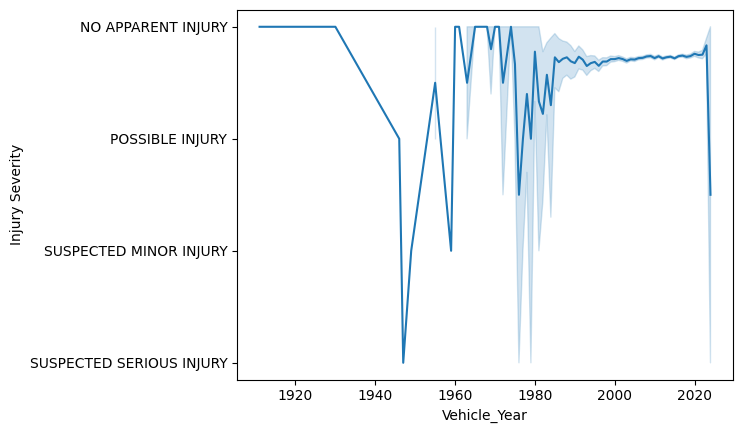

In [37]:
#(MAYBE TAKE THIS CELL OUT ****)
#Do we see injury severity as being conditional on the year of the car
# This plot is very hard to read/understand, likely because of several outliers in terms of older cars.
sns.lineplot(data=df, x='Vehicle_Year',y='Injury Severity',)

### Damage Ordinal

<AxesSubplot:xlabel='Vehicle_Year', ylabel='Damage_Ordinal'>

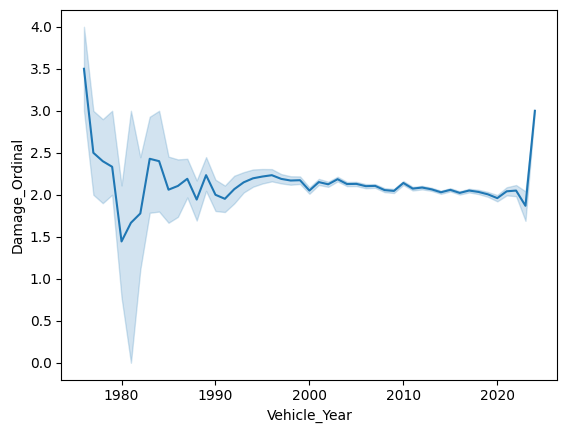

In [38]:
#(MAYBE TAKE THIS CELL OUT ****)
#Doing the same graph but removing anything before 1975 as the data of cars that old is very limited
old_cars_removed = df[df['Vehicle_Year'] > 1975]
sns.lineplot(data=old_cars_removed,x='Vehicle_Year',y='Damage_Ordinal')
#Now it looks like cars are getting safer overall, but we have a spike in injuries near the end, this could be due to 2024,
#So we have also decided to exclude that as the data there is limited as well

#### Vehicle Year Without New Car outliers

<AxesSubplot:xlabel='Vehicle_Year', ylabel='Damage_Ordinal'>

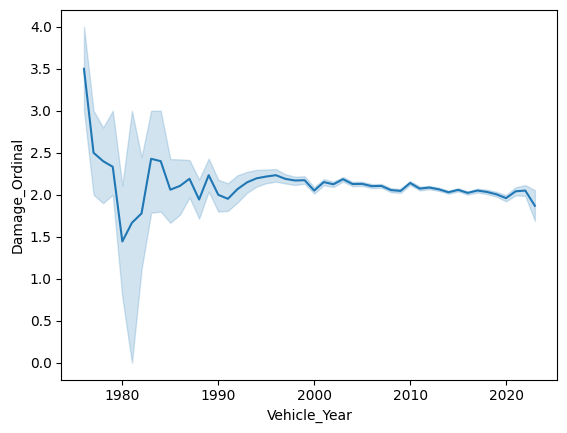

In [39]:
new_cars_removed = old_cars_removed[old_cars_removed['Vehicle Year'] < 2024]
sns.lineplot(data=new_cars_removed,x='Vehicle_Year',y='Damage_Ordinal')

In [40]:
#Maybe make vehicle year. years after 1975. Then run regression. Also change Vehicle year to Vehicle_Year. %%ASSUMPTION%%

### Injury Ordinal

<AxesSubplot:xlabel='Vehicle_Year', ylabel='Injury_Ordinal'>

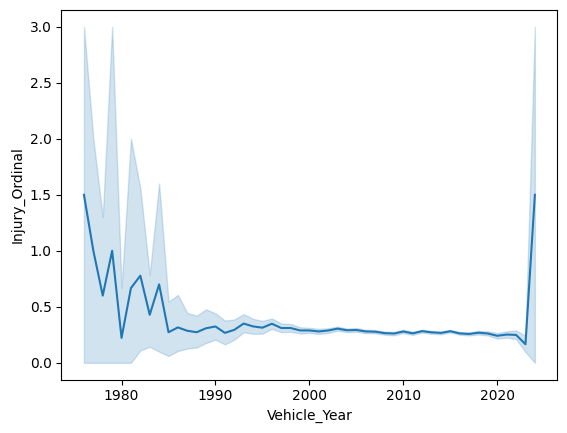

In [41]:
#(MAYBE TAKE THIS CELL OUT ****)
#Doing the same graph but removing anything before 1975 as the data of cars that old is very limited
old_cars_removed = df[df['Vehicle_Year'] > 1975]
sns.lineplot(data=old_cars_removed,x='Vehicle_Year',y='Injury_Ordinal')
#Now it looks like cars are getting safer overall, but we have a spike in injuries near the end, this could be due to 2024,
#So we have also decided to exclude that as the data there is limited as well

#### Vehicle Year Without New Car outliers

<AxesSubplot:xlabel='Vehicle_Year', ylabel='Injury_Ordinal'>

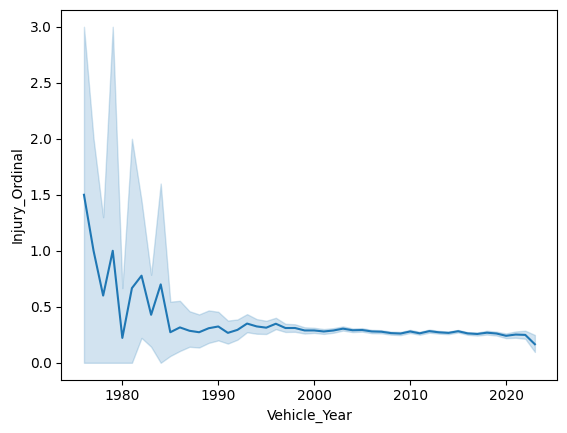

In [42]:
# Restricting the timeframe for the plot for a cleaner line
"""
It looks like in general, cars have gotten safer over the years, as the average values for injury severity have
decreased fairly consistently.
"""
sns.lineplot(data=new_cars_removed,x='Vehicle_Year',y='Injury_Ordinal')

## Weather

### Damage Ordinal

<AxesSubplot:ylabel='Weather'>

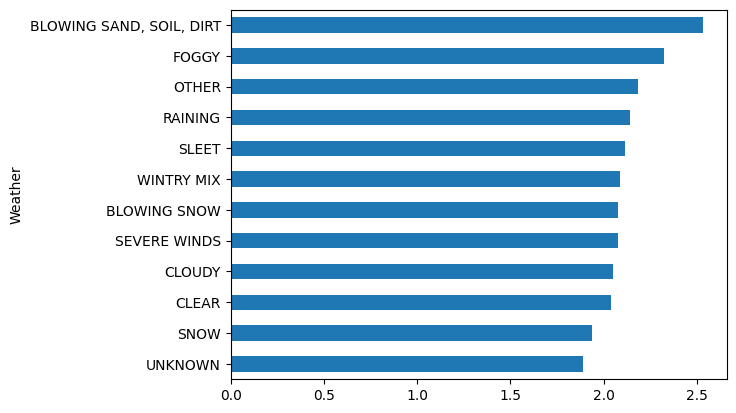

In [43]:
#Plotting Weather and Damage Severity
"""
Blowing sand, soil, dirt is the highest category for both injury and vehicle damage, but there is a difference in 
other categories.
"""
averages_weather2 = df[['Weather', 'Damage_Ordinal']].groupby('Weather').mean()
averages_weather2 = averages_weather2['Damage_Ordinal'].sort_values()
averages_weather2.plot(kind = 'barh')

In [44]:
obs_damage_weather = df_severe_damage["Weather"].value_counts()
exp_damage_weather = df["Weather"].value_counts()*df_severe_damage.shape[0]/df.shape[0]
chisquare(obs_damage_weather, f_exp = exp_damage_weather)

Power_divergenceResult(statistic=26.312451731194827, pvalue=0.0058295657614533675)

### Injury Ordinal

<AxesSubplot:ylabel='Weather'>

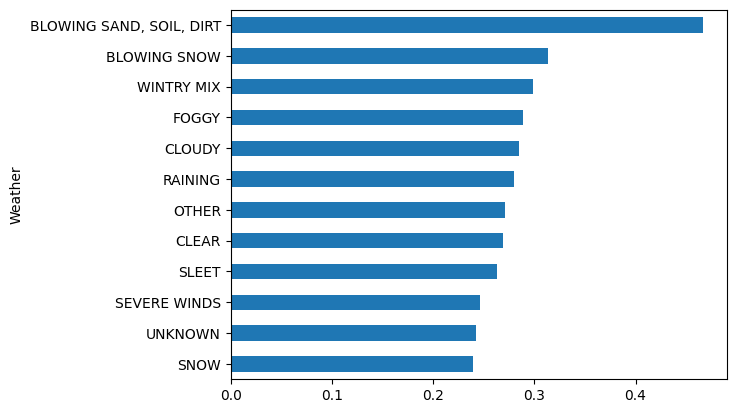

In [45]:
averages_weather2 = df[['Weather', 'Injury_Ordinal']].groupby('Weather').mean()
averages_weather2 = averages_weather2['Injury_Ordinal'].sort_values()
averages_weather2.plot(kind = 'barh')

In [46]:
obs_injury_weather = df_severe_injury_special["Weather"].value_counts()
exp_injury_weather = df["Weather"].value_counts()*df_severe_injury_special.shape[0]/df.shape[0]
chisquare(obs_injury_weather, f_exp = exp_injury_weather)

Power_divergenceResult(statistic=17.85464473793749, pvalue=0.08501522978219998)

Check column names to have underscore to make it easier to run regressions. Check to see which vehicle year graphs we want to keep.

In [47]:
df.head()

,ACRS Report Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,Injury Severity,Driver Distracted By,...,Vehicle Year,Vehicle Make,Location,Date,Time,Injury_Ordinal,Damage_Ordinal,Minutes,Days_Since_Jan_1,Vehicle_Year
0,Property Damage Crash,SINGLE VEHICLE,CLEAR,UNKNOWN,DAYLIGHT,UNKNOWN,NONE DETECTED,Yes,NO APPARENT INJURY,NOT DISTRACTED,...,2017,Other,"(39.10351817, -77.15766933)",2019-09-26,07:20:00,0,1,440,268,2017.0
1,Property Damage Crash,OTHER,CLOUDY,DRY,UNKNOWN,UNKNOWN,UNKNOWN,Yes,NO APPARENT INJURY,UNKNOWN,...,2020,Other,"(39.15484667, -77.271245)",2020-06-18,02:00:00,0,0,120,169,2020.0
2,Property Damage Crash,OTHER,CLEAR,UNKNOWN,DAYLIGHT,UNKNOWN,UNKNOWN,Yes,NO APPARENT INJURY,UNKNOWN,...,2010,Toyota,"(39.02030267, -77.01143583)",2021-09-08,12:30:00,0,1,750,250,2010.0
3,Property Damage Crash,OTHER,CLEAR,DRY,DAYLIGHT,NO CONTROLS,ALCOHOL PRESENT,Yes,NO APPARENT INJURY,UNKNOWN,...,2004,Dodge,"(39.08006167, -77.097845)",2020-04-19,15:39:00,0,3,939,109,2004.0
4,Injury Crash,OTHER,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,Yes,POSSIBLE INJURY,UNKNOWN,...,2006,Honda,"(39.17523, -77.24109)",2020-04-20,09:15:00,1,3,555,110,2006.0


In [125]:
df["Vehicle Year"].fillna(0)

0         2017
1         2020
2         2010
3         2004
4         2006
          ... 
159352    2010
159353    2020
159354    2019
159355    2000
159356    2000
Name: Vehicle Year, Length: 159357, dtype: int64

In [127]:
df.dropna(inplace=True)

In [336]:
features = df.copy()

In [337]:
features.columns

Index(['ACRS Report Type', 'Collision Type', 'Weather', 'Surface Condition',
       'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault',
       'Injury Severity', 'Driver Distracted By', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type', 'Speed Limit',
       'Vehicle Year', 'Vehicle Make', 'Location', 'Date', 'Time',
       'Injury_Ordinal', 'Damage_Ordinal', 'Minutes', 'Days_Since_Jan_1',
       'Vehicle_Year'],
      dtype='object')

In [338]:
features = features[['Weather', 'Surface Condition',
       'Light', 'Traffic Control', 'Driver Substance Abuse','Speed Limit','Vehicle Make','Minutes',
       'Vehicle_Year']]


In [339]:
features["Weather"] = features['Weather'].replace(
    {"CLEAR": 0, "RAINING": 2, "CLOUDY": 1, "UNKNOWN": 1, "SNOW": 3, "FOGGY": 2, "WINTRY MIX": 3, "OTHER": 1,
    "SLEET": 5, "SEVERE WINDS": 5, "BLOWING SNOW": 5, "BLOWING SAND, SOIL, DIRT": 5})

In [340]:
features["Road"] = features['Surface Condition'].replace(
    {'DRY':0, 'WET':1, 'UNKNOWN':1, 'ICE':3, 'SNOW':3, 'SLUSH':3, 'OTHER':1,
       'MUD, DIRT, GRAVEL':2, 'WATER(STANDING/MOVING)':3, 'OIL':3, 'SAND':2})

In [341]:
features["Light"] = features['Light'].replace(
    {'DAYLIGHT':0, 'DARK LIGHTS ON':2, 'DARK NO LIGHTS':4, 'DUSK':2, 'DAWN':2,
       'UNKNOWN':2, 'DARK -- UNKNOWN LIGHTING':2, 'OTHER':2})

In [342]:
features["substance"] = features['Driver Substance Abuse'].apply(lambda x: 4 if ("PRESENT" in x) or ("CONTRIBUTED" in x) or ("COMBINED" in x) else 0)



In [343]:
features = features.drop("Driver Substance Abuse", axis=1)
features.head()

,Weather,Surface Condition,Light,Traffic Control,Speed Limit,Vehicle Make,Minutes,Vehicle_Year,Road,substance
0,0,UNKNOWN,0,UNKNOWN,15,Other,440,2017.0,1,0
1,1,DRY,2,UNKNOWN,35,Other,120,2020.0,0,0
2,0,UNKNOWN,0,UNKNOWN,0,Toyota,750,2010.0,1,0
3,0,DRY,0,NO CONTROLS,25,Dodge,939,2004.0,0,4
4,1,DRY,0,NO CONTROLS,25,Honda,555,2006.0,0,0


In [344]:
one_hot = pd.get_dummies(features['Vehicle Make'], drop_first=True)

features = features.drop('Vehicle Make',axis = 1)
# Join the encoded df
#features = features.join(one_hot)

In [345]:
features.columns

Index(['Weather', 'Surface Condition', 'Light', 'Traffic Control',
       'Speed Limit', 'Minutes', 'Vehicle_Year', 'Road', 'substance'],
      dtype='object')

In [346]:
features["Traffic Control"] = features['Traffic Control'].apply(lambda x: 1 if x in ["NO CONTROLS", "UNKNOWN", "OTHER"] else 0)




In [347]:
features = features.drop("Surface Condition", axis=1)


In [348]:
features = features.astype("float64")

In [349]:
df['Vehicle Damage Extent'].value_counts()

DISABLING      57675
FUNCTIONAL     41157
SUPERFICIAL    40222
NO DAMAGE       9537
DESTROYED       6897
Name: Vehicle Damage Extent, dtype: int64

In [378]:
df['Vehicle Damage Extent'] = df['Vehicle Damage Extent'].apply(lambda x: "NO DAMAGE" if x in ["UNKNOWN", "OTHER"] else x)
y = df[['Vehicle Damage Extent']]

In [379]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=42)


In [431]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier

In [453]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=10, random_state = 13)
#model = KNeighborsClassifier(n_neighbors=4, weights="uniform")
#model = RidgeClassifier()

In [454]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=13)

In [455]:
train_pred = model.predict(X_train)

In [456]:
from sklearn.metrics import accuracy_score

In [457]:
train_pred

array(['DISABLING', 'SUPERFICIAL', 'DISABLING', ..., 'DISABLING',
       'DISABLING', 'SUPERFICIAL'], dtype=object)

In [458]:
train_score = accuracy_score(y_train, train_pred)
train_score

0.41667946551988944

In [459]:
test_pred = model.predict(X_test)

In [460]:
test_score = accuracy_score(y_test, test_pred)
test_score

0.4018358278765201

In [461]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

   DESTROYED       0.20      0.01      0.02      2318
   DISABLING       0.40      0.90      0.56     18916
  FUNCTIONAL       0.30      0.02      0.04     13607
   NO DAMAGE       0.10      0.00      0.00      3141
 SUPERFICIAL       0.40      0.25      0.31     13330

    accuracy                           0.40     51312
   macro avg       0.28      0.24      0.19     51312
weighted avg       0.35      0.40      0.30     51312



In [462]:
#pd.DataFrame(model.feature_importances_, index=features.columns)


In [463]:
model.score(X_train, y_train, sample_weight=None)

0.41667946551988944